# Summary

Behavior of fitted models. In the manuscript: **Fig. 2E-H**.

---
# Setup

In [1]:
# imports
import os

import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from popy.plotting_tools import plot_hist_thingy, plot_strategy
from popy.behavior_data_tools import convert_column_format, add_switch_info, add_history_of_feedback
from popy.config import PROJECT_PATH_LOCAL

In [2]:
# local functions
def load_results(monkey):
    floc = os.path.join(PROJECT_PATH_LOCAL, 'data', 'results', 'model_fitting', f'simulation_behaviors_{monkey}.pkl')
    behav = pd.read_pickle(floc)

    # processing dataset (change namings, drop unwanted models)
    models_to_drop = ['Inferential RL', 'Standard RL']  # we plot only the sticky models
    model_naming = {  # rename models for plotting
        'WSLS agent': 'WSLS',
        'Inferential RL - stickyness': 'Inferential RL',
        'Standard RL - stickyness': 'Standard RL',
        'recording': monkey,
    }
    # filter out unwanted models and rename
    behav = behav[~behav['model'].isin(models_to_drop)].copy()
    for old_name, new_name in model_naming.items():
        behav.loc[behav['model'] == old_name, 'model'] = new_name


    # Apply the function to create the monkey column
    behav['monkey'] = behav['model']

    behav = convert_column_format(behav, original='simulation')  # renames columns to standard names
    behav = add_switch_info(behav)
    behav = add_history_of_feedback(behav, num_trials=3, one_column=False, coding=(0, 1))
    behav = behav.dropna(subset=[f'R_{i}' for i in range(1, 4)] + ['switch'])  # drop rows with NaN in any of the R_i columns


    return behav

---
# Simulated agent behavior

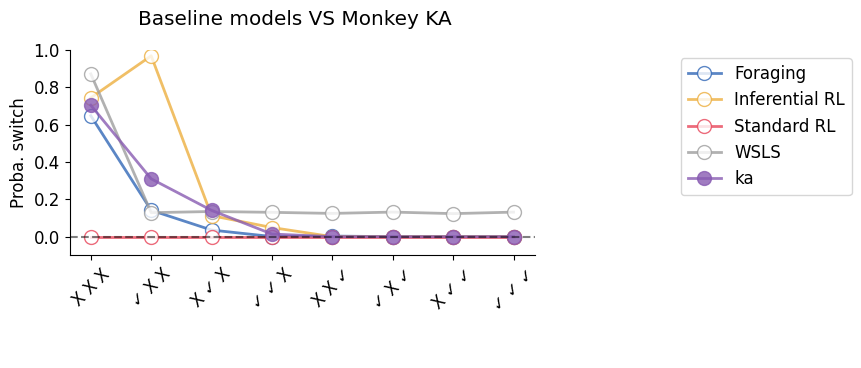

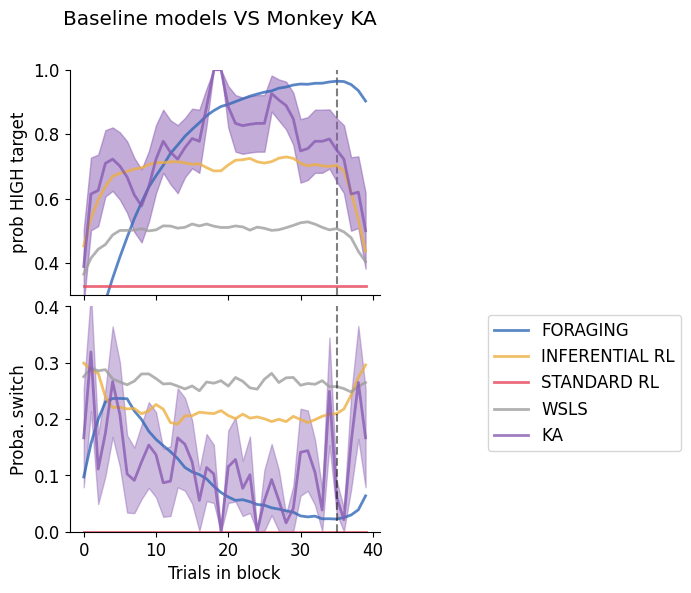

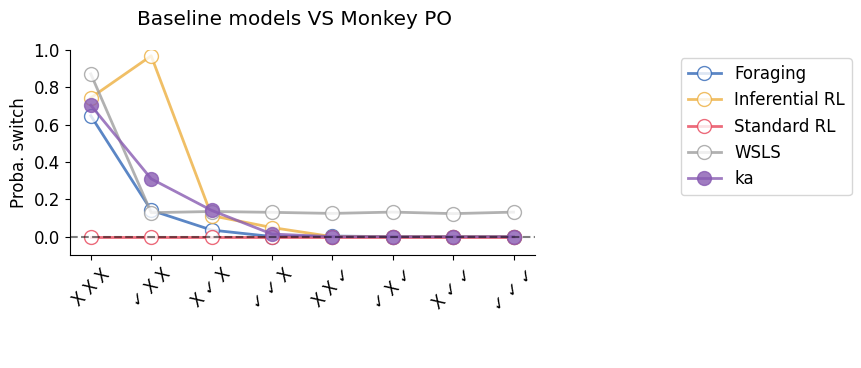

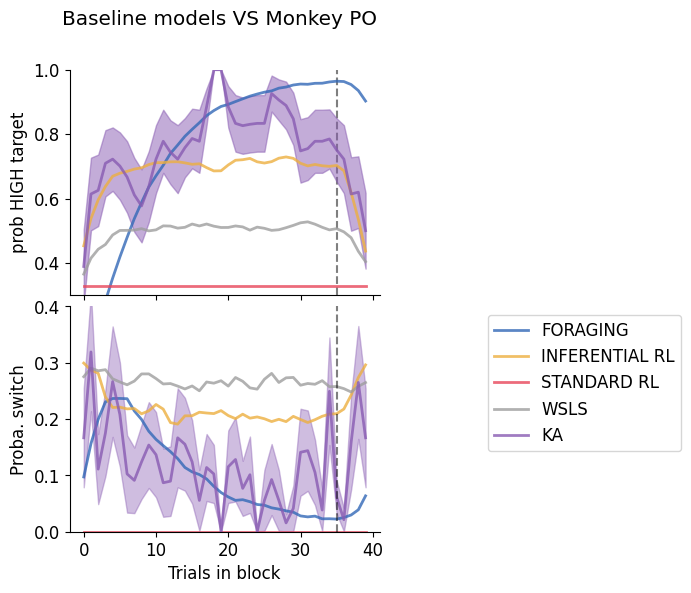

In [3]:
for monkey in ['ka', 'po']:#, 'yu_sham', 'yu_DCZ']:
    behav = load_results('ka')
    
    fig1, _ = plot_hist_thingy(behav, title=f'Baseline models VS Monkey {monkey.upper()}', paper_format=False)
    plt.show()

    fig2, _ = plot_strategy(behav, title=f'Baseline models VS Monkey {monkey.upper()}', paper_format=False, h=2, w=1.6, ylim=[0, .4], verbose=False)
    plt.show()

    plt.close(fig1)
    plt.close(fig2)